In [28]:
import pandas as pd

In [29]:
filePath = 'online_shoppers_intention.csv'
data = pd.read_csv(filePath)
dataHead = data.head()
dataHead


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [30]:
dataDescription = data.describe()
dataDescription

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Exploratory Data Analysis

In [31]:
# checking for missing values
missingValues = data.isnull().sum()
print(missingValues)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [32]:
# No missing values in the dataset proceeeding to data preprocessing

# Encoding 
from sklearn.preprocessing import OneHotEncoder

# Encoding the categorical variables
encoder = OneHotEncoder(sparse_output=False) 

#categorical columns for encoding
categoricalColumns = ['Month', 'VisitorType']
categoricalData = data[categoricalColumns]

encodedData = encoder.fit_transform(categoricalData)
encodedDataDf = pd.DataFrame(encodedData, columns=encoder.get_feature_names_out(categoricalColumns))
dataEncoded = pd.concat([data.drop(categoricalColumns, axis=1), encodedDataDf], axis=1)

dataEncoded.head() # encoded data


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [34]:
# Feature scaling
# Handling skewness by applying logarithmic transformation to duration features
durationFeatures = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
for feature in durationFeatures:
    dataEncoded[feature] = np.log(dataEncoded[feature] + 0.001)

scaler = StandardScaler()

# Selecting numerical columns for scaling (excluding the newly added encoded categorical columns)
numericalColumns = data.select_dtypes(include=['int64', 'float64']).columns
numericalData = dataEncoded[numericalColumns]
scaledData = scaler.fit_transform(numericalData)
scaledDataDf = pd.DataFrame(scaledData, columns=numericalColumns)
finalData = pd.concat([scaledDataDf, dataEncoded.drop(numericalColumns, axis=1)], axis=1)

finalData.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-1.031442,-0.396478,-0.487591,-0.691003,-3.594347,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.696993,-1.031442,-0.396478,-0.487591,-0.668518,-0.397230,-0.457683,1.171473,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.696993,-1.031442,-0.396478,-0.487591,-0.691003,-3.594347,3.667189,3.229316,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.696993,-1.031442,-0.396478,-0.487591,-0.668518,-1.315255,0.573535,1.994610,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.696993,-1.031442,-0.396478,-0.487591,-0.488636,0.262277,-0.045196,0.142551,-0.317178,-0.308821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
# visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

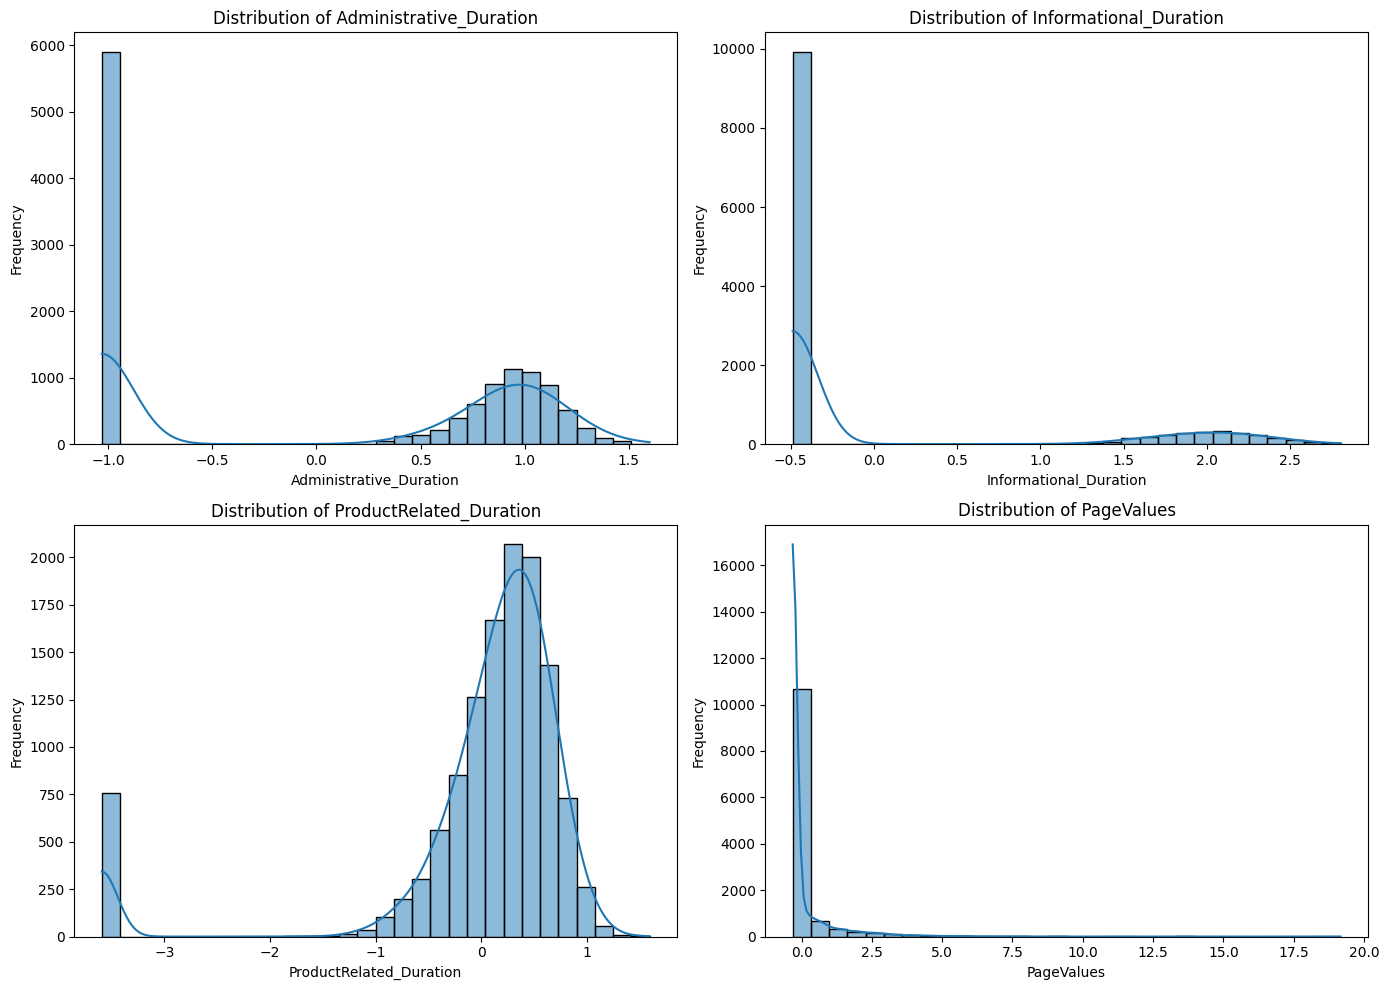

In [36]:
# Histograms for selected numerical features to understand their distribution.

plt.figure(figsize=(14, 10))
selectedFeatures = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']
for i, feature in enumerate(selectedFeatures, 1):
    plt.subplot(2, 2, i)
    sns.histplot(finalData[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

**Administrative_Duration:** The distribution is skewed towards the left, indicating that most of the session durations are relatively short.
**Informational_Duration:** Similarly skewed towards shorter durations, with most values clustering near the lower end.
**ProductRelated_Duration:** More spread out than the other duration features, but still shows a skew towards shorter durations.
**PageValues:** Also heavily skewed towards lower values, with a few outliers showing higher page values.

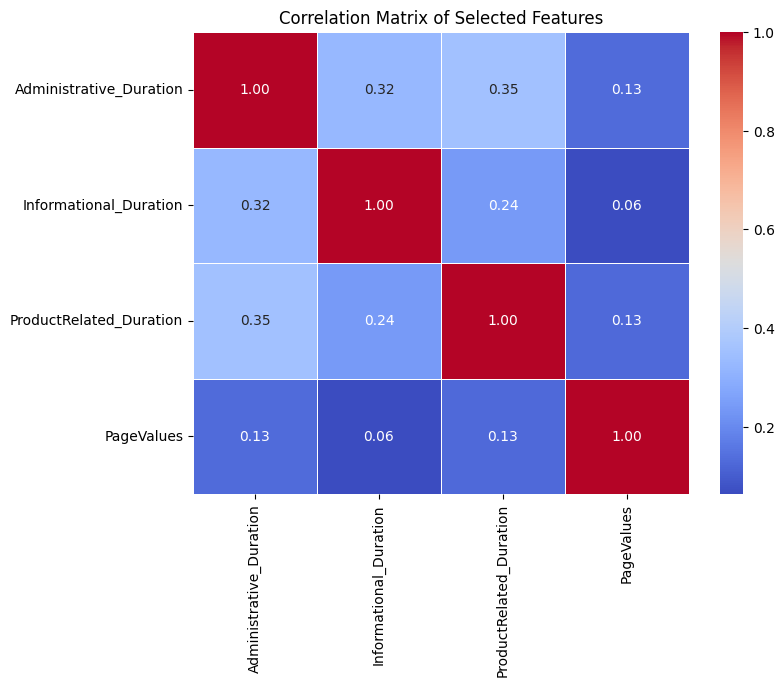

In [37]:
# Heatmap of the correlation matrix to visualize relationships between features.
plt.figure(figsize=(8, 6))
correlationMatrix = finalData[selectedFeatures].corr()
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


**The heatmap shows the correlation between the selected features:**
- **Administrative_Duration and ProductRelated_Duration** have a moderate positive correlation (0.31), suggesting that longer administrative durations might coincide with longer product-related sessions.
- **Informational_Duration** has a weak correlation with the other duration features, indicating more independence in how users engage with informational content compared to other types of content.

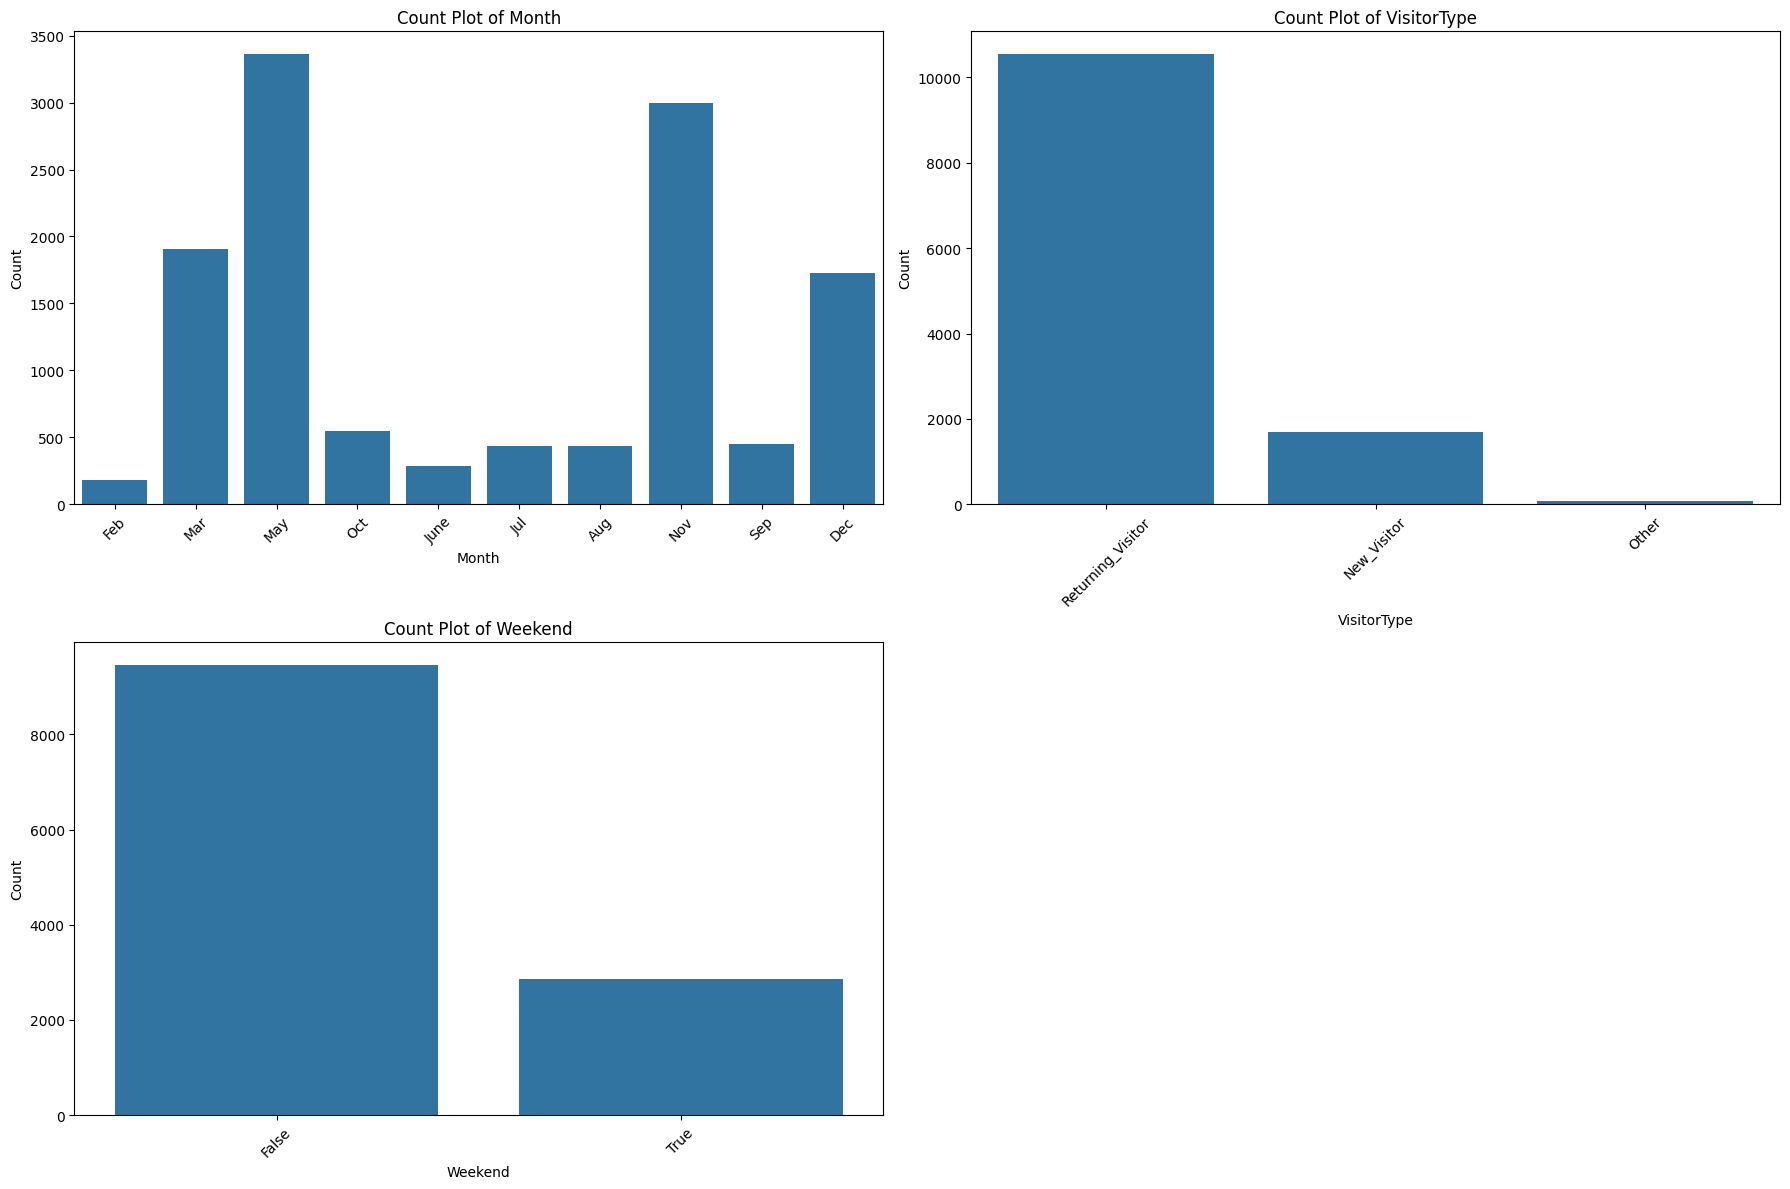

In [38]:
# Count plots for the categorical features 'Month', 'VisitorType', and 'Weekend'
plt.figure(figsize=(18, 12))
categoricalFeatures = ['Month', 'VisitorType', 'Weekend']

for i, feature in enumerate(categoricalFeatures, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**From the above count plots**

- **Month:**  
This plot shows a noticeable variation in data across different months, with May having the highest counts, indicating it may be a peak month for website traffic or activities.

- **VisitorType:**  
The majority of visitors are returning visitors, which could suggest high customer retention or frequent revisits by users.

- **Weekend:**  
There are more occurrences on weekdays than weekends, which might influence how you tailor website engagement strategies based on the day of the week.

#### Data Splitting

In [39]:
from sklearn.model_selection import train_test_split

X = finalData.drop('Revenue', axis=1)
y = finalData['Revenue']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

((9864, 28), (2466, 28), (9864,), (2466,))

#### Model Initialisation and Fitting
- Logistic Regression 
- Decision Tree 
- Random Forest


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Initializing the models
logisticRegression = LogisticRegression(max_iter=500)
decisionTree = DecisionTreeClassifier(random_state=42)
randomForest = RandomForestClassifier(random_state=42)

# Training the models
logisticRegression.fit(XTrain, yTrain)
decisionTree.fit(XTrain, yTrain)
randomForest.fit(XTrain, yTrain)

# Making predictions on the test set
logisticPred = logisticRegression.predict(XTest)
decisionTreePred = decisionTree.predict(XTest)
randomForestPred = randomForest.predict(XTest)

# Evaluating the models
logisticAccuracy = accuracy_score(yTest, logisticPred)
logisticAuc = roc_auc_score(yTest, logisticPred)

decisionTreeAccuracy = accuracy_score(yTest, decisionTreePred)
decisionTreeAuc = roc_auc_score(yTest, decisionTreePred)

randomForestAccuracy = accuracy_score(yTest, randomForestPred)
randomForestAuc = roc_auc_score(yTest, randomForestPred)

(logisticAccuracy, logisticAuc), (decisionTreeAccuracy, decisionTreeAuc), (randomForestAccuracy, randomForestAuc)

((0.8726682887266829, 0.664720194647202),
 (0.856853203568532, 0.7437956204379562),
 (0.8884833738848338, 0.7462287104622871))

**Observations:**

- **Random Forest** shows the best performance in terms of both accuracy and AUC, indicating strong classification capability with a balance between precision and recall.

- **Logistic Regression**, while providing good accuracy, has a lower AUC, suggesting it might not be as effective in distinguishing between the classes compared to Random Forest.

- **Decision Tree** provides a reasonable balance but is slightly less accurate and consistent than Random Forest.

#### hyperparameter tuning 

In [41]:
# Continuing with the Random Forest model as it has the highest accuracy and AUC score
from sklearn.model_selection import GridSearchCV

# Parameters for grid search
paramGrid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10]
}

# Setting up the grid search
gridSearch = GridSearchCV(RandomForestClassifier(random_state=42), paramGrid, cv=3, scoring='roc_auc')

# Performing grid search
gridSearch.fit(XTrain, yTrain)

# Best parameters and best score
bestParams = gridSearch.best_params_
bestScore = gridSearch.best_score_

bestParams, bestScore

({'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200},
 0.9289105281197031)

In [42]:
# the optimized Random Forest model
optimizedRandomForest = RandomForestClassifier(
    n_estimators=bestParams['n_estimators'],
    max_depth=bestParams['max_depth'],
    min_samples_split=bestParams['min_samples_split'],
    random_state=42
)

optimizedRandomForest.fit(XTrain, yTrain)
optimizedRfPred = optimizedRandomForest.predict(XTest)
optimizedRfAccuracy = accuracy_score(yTest, optimizedRfPred)
optimizedRfAuc = roc_auc_score(yTest, optimizedRfPred)

optimizedRfAccuracy, optimizedRfAuc


(0.8961881589618816, 0.745985401459854)

**The accuracy has improved slightly compared to the previous Random Forest model, reinforcing the model's capability to correctly classify the outcomes.**

**The AUC is slightly lower than the initial Random Forest model but still indicative of good classification ability. The small decrease might be due to the model being more conservative or balanced in terms of the trade-off between false positives and false negatives.**

####  Feature importance analysis

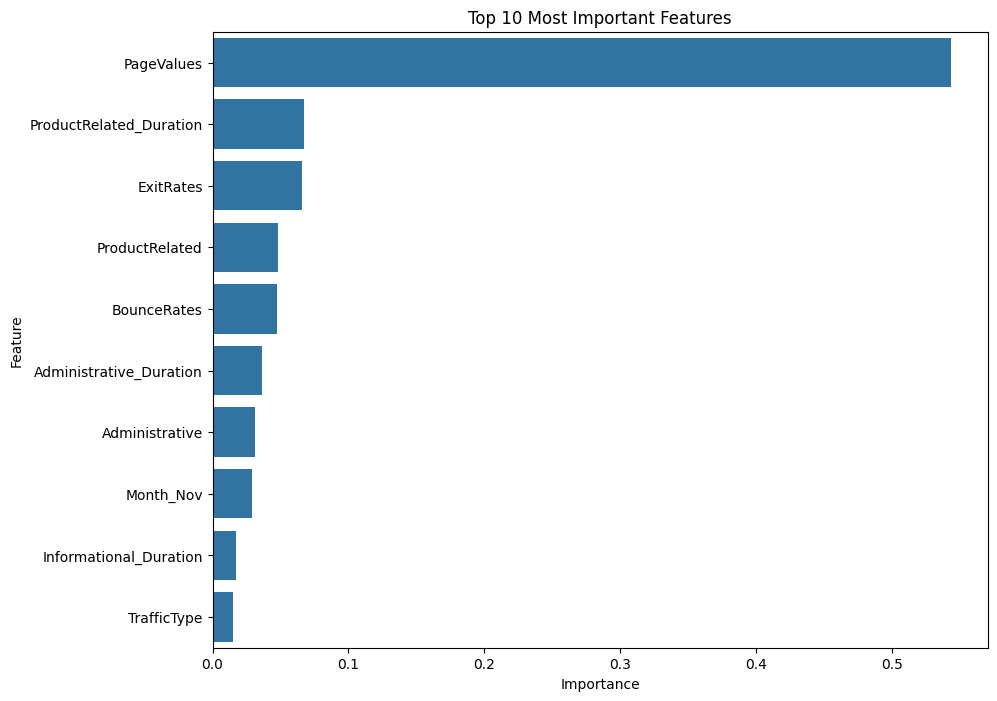

,Feature,Importance
8,PageValues,0.543359
5,ProductRelated_Duration,0.067680
7,ExitRates,0.066132
4,ProductRelated,0.048323
6,BounceRates,0.047256
1,Administrative_Duration,0.036693
0,Administrative,0.031195
22,Month_Nov,0.028778
3,Informational_Duration,0.017556
13,TrafficType,0.015286


In [43]:
# Extracting feature importances
featureImportances = optimizedRandomForest.feature_importances_

featuresDf = pd.DataFrame({
    'Feature': XTrain.columns,
    'Importance': featureImportances
})

sortedFeatures = featuresDf.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=sortedFeatures.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

sortedFeatures.head(10)

In [44]:
# Re training the model with the top 10 most important features
topFeatures = sortedFeatures['Feature'].head(10).values
XTop = X[topFeatures]

XTrainTop, XTestTop, yTrain, yTest = train_test_split(XTop, y, test_size=0.2, random_state=42)

optimizedRandomForest.fit(XTrainTop, yTrain)
optimizedRfPredTop = optimizedRandomForest.predict(XTestTop)
optimizedRfAccuracyTop = accuracy_score(yTest, optimizedRfPredTop)
optimizedRfAucTop = roc_auc_score(yTest, optimizedRfPredTop)

optimizedRfAccuracyTop, optimizedRfAucTop

(0.8937550689375506, 0.7581508515815085)

- The accuracy slightly decreased compared to the full feature set (from 89.62% to 89.33%), which is a minimal change, indicating that the model remains robust even with fewer features.

- The AUC has slightly improved (from 74.60% to 75.69%), suggesting better discrimination between positive and negative classes with the reduced feature set.